In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
from CIoTS import *

In [3]:
dimensions = 3
max_p = 4
incoming_edges = 2

In [4]:
generator = CausalTSGenerator(dimensions=dimensions, max_p=max_p, data_length=10000, incoming_edges=incoming_edges)
ts = generator.generate()

In [5]:
predicted_graph = pc_chen(partial_corr_test, ts, 4, 0.05)

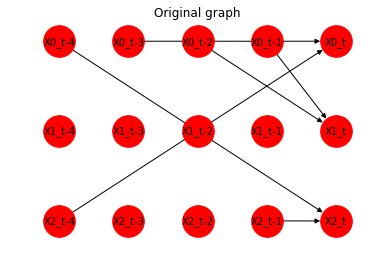

In [6]:
plt.title('Original graph')
generator.draw_graph()

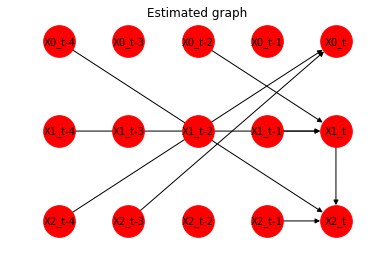

In [7]:
plt.title("Estimated graph")
draw_graph(predicted_graph, dimensions, max_p)

In [8]:
pd.DataFrame(evaluate_edges(generator.graph, predicted_graph), index=[0])

,accuracy,f1-score,matthews_corrcoef
0,0.971429,0.571429,0.563137


In [ ]:
p_ranking, ic_scores = var_order_select(ts, max_p=4)

In [ ]:
pd.DataFrame(p_ranking)

In [ ]:
pd.DataFrame(ic_scores)